# K-NN Evaluation 
  
### The following sets of methods are used to evaluate an embedding  

The method used to evaluate the embedding is KNN with 1 neighbour.

# Used methods:
1) Kernel = NSPDK  
2) Dim. reduc = SVD  
3) Evaluation = K nearest neighbour k=1

### Import libraries

In [2]:
import networkx as nx

import os
import re
import pydot







### Usage:
To use "import data" you must specify the folder name and the number of graphs  
The imported graph is printed using EDeN method

In [31]:
import numpy as np
import load_data as ld
from eden.graph import vectorize
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier  
graphs_label=ld.load_data("MUTAG")

In [32]:
graphs_label = np.array(graphs_label)
graphs = graphs_label[:,0]
label = graphs_label[:,1]

### Vectorize the graph using EDeN
### Reduce the dimensionality using Singular Value Decomposition (SVD)

In [65]:
X = vectorize(graphs, complexity=12)
Xd = TruncatedSVD(n_components=2).fit_transform(X)

### Use KNN to classify the data

In [66]:
#import data:
y_real = [[x] for x in label]
y_real = np.ravel(y_real)

classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(Xd,y_real)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

### Predict and compute the confusion matrix

In [67]:
y_pred = []


for i in Xd:
    tmp = classifier.predict([i])
    y_pred.append(tmp)
    

from sklearn import metrics

CM = metrics.confusion_matrix(y_real, y_pred)
accuracy = metrics.accuracy_score(y_real,y_pred)
recall = metrics.recall_score(y_real,y_pred)
f1 = metrics.f1_score(y_real,y_pred)
precision = metrics.precision_score(y_real,y_pred)


print ("confusion matrix: \n",CM)
print ("accuracy:\t ",accuracy)
print ("precision:\t ",precision)
print ("recall:\t \t ",recall)
print ("f1: \t \t ",f1)

confusion matrix: 
 [[ 63   0]
 [ 16 109]]
accuracy:	  0.9148936170212766
precision:	  1.0
recall:	 	  0.872
f1: 	 	  0.9316239316239316


# Some Plots

In [68]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

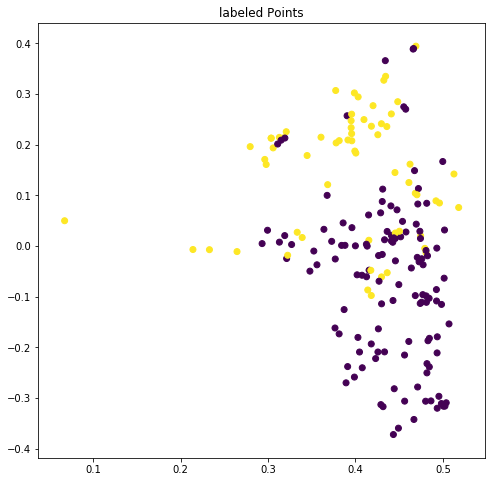

In [70]:
mapping=[]
for t in y_real:
    if (t == 0):
        mapping.append(200)
    else:
        mapping.append(10)


plt.figure(figsize=(8, 8)) 
plt.scatter(Xd[:,0],Xd[:,1], c=mapping)
plt.title("labeled Points")
plt.show()

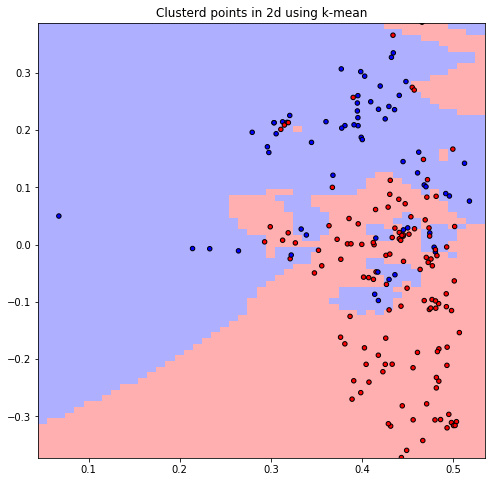

In [71]:
h = .01
# Plot the decision boundary. For that, we will assign a color to each

x_border = (Xd[:, 0].mean()/len(Xd))*10
y_border = (Xd[:, 1].mean()/len(Xd))*10

x_min, x_max = Xd[:, 0].min() - x_border, Xd[:, 0].max() + x_border
y_min, y_max = Xd[:, 1].min() - y_border, Xd[:, 1].max() + y_border
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cmap_background = ListedColormap(['#AFAFFF', '#FFAFAF'])
cmap_points = ListedColormap(['#0000FF','#FF0000'])


# Obtain labels for each point in mesh. Use last trained model.
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 8)) 
plt.pcolormesh(xx, yy, Z, cmap=cmap_background)

# Plot also the training points
plt.scatter(Xd[:, 0], Xd[:, 1], c=label, cmap=cmap_points,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Clusterd points in 2d using k-mean")
plt.show()



# Find the best dimension

In the following, we try the same embedding using many dimensions.  
Finally, we plot accuracy, precision, recall and f1 score. 

In [72]:
from sklearn import metrics
import matplotlib.pyplot as plt

dims = np.arange(2,100,10)

accuracy = []
recall = []
f1 = []
precision = []

for d in dims:
    
    ## reduction of the dimenction
    Xd = TruncatedSVD(n_components = d).fit_transform(X)
    
    ## train KNN
    classifier = None
    classifier = KNeighborsClassifier(n_neighbors=2)  
    classifier.fit(Xd,y_real) 


    y_pred = []
    for i in Xd:
        tmp = classifier.predict([i])
        y_pred.append(tmp[0])



    accuracy.append(metrics.accuracy_score(y_real,y_pred))
    recall.append(metrics.recall_score(y_real,y_pred))
    f1.append(metrics.f1_score(y_real,y_pred))
    precision.append(metrics.precision_score(y_real,y_pred))


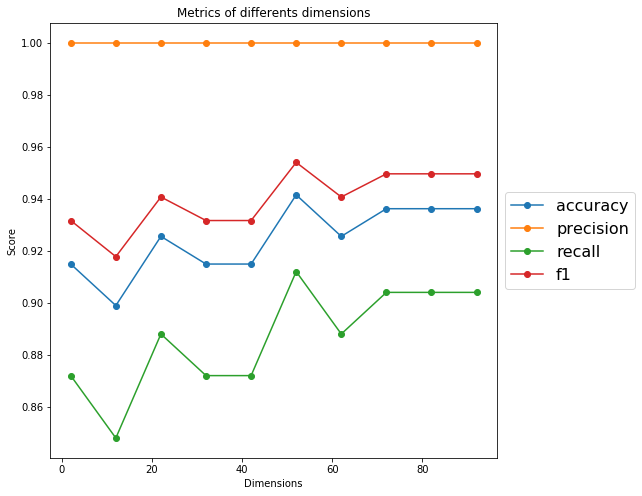

In [73]:
plt.figure(figsize=(8, 8))
plt.plot(dims,accuracy,'o-',label="accuracy")
plt.plot(dims,precision,'o-',label="precision")
plt.plot(dims,recall,'o-',label="recall")
plt.plot(dims,f1,'o-',label="f1")
plt.xlabel("Dimensions")
plt.ylabel("Score")
plt.title("Metrics of differents dimensions")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})  